In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [3]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

logista = df[df['empresa'] == 'Logista']

logista.shape

(1325, 10)

In [4]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

logista = logista [['date','open','high','low','close','adj close']]

logista.shape

(1325, 6)

In [5]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

logista['date'] = pd.to_datetime(logista['date'], format="%Y-%m-%d")

logista.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 28500 to 29824
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [6]:
# Paso 5: Ordenar el DF por fecha

logista.sort_values(by='date',ascending= True, inplace=True)

logista.head()

,date,open,high,low,close,adj close
29823,2019-01-02,21.879999,21.879999,21.500000,21.840000,14.784389
29601,2019-01-03,21.740000,22.020000,21.540001,21.840000,14.784389
28504,2019-01-04,21.860001,22.400000,21.860001,22.299999,15.095782
28503,2019-01-07,22.320000,22.440001,22.020000,22.360001,15.136400
28502,2019-01-08,22.400000,22.780001,22.400000,22.700001,15.366557


In [7]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

acciona = logista[(logista['date'] >= fecha_inicio) & (logista['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

logista.shape

(1325, 6)

In [8]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=logista['date'].min(), end=logista['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

logista = logista.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

logista = logista.rename(columns={'index': 'date'})


In [9]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

logista.head(10)

,date,open,high,low,close,adj close
0,2019-01-02,21.879999,21.879999,21.500000,21.840000,14.784389
1,2019-01-03,21.740000,22.020000,21.540001,21.840000,14.784389
2,2019-01-04,21.860001,22.400000,21.860001,22.299999,15.095782
3,2019-01-05,NaN,NaN,NaN,NaN,NaN
4,2019-01-06,NaN,NaN,NaN,NaN,NaN
5,2019-01-07,22.320000,22.440001,22.020000,22.360001,15.136400
6,2019-01-08,22.400000,22.780001,22.400000,22.700001,15.366557
7,2019-01-09,22.799999,22.940001,22.540001,22.639999,15.325943
8,2019-01-10,22.680000,22.760000,22.440001,22.520000,15.244713
9,2019-01-11,22.680000,22.700001,22.500000,22.500000,15.231172


In [10]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

logista = logista.fillna(method='ffill')

In [11]:
# Paso 10: Comprobar que se han introducido los valores correctamente


logista.head(10)

,date,open,high,low,close,adj close
0,2019-01-02,21.879999,21.879999,21.500000,21.840000,14.784389
1,2019-01-03,21.740000,22.020000,21.540001,21.840000,14.784389
2,2019-01-04,21.860001,22.400000,21.860001,22.299999,15.095782
3,2019-01-05,21.860001,22.400000,21.860001,22.299999,15.095782
4,2019-01-06,21.860001,22.400000,21.860001,22.299999,15.095782
5,2019-01-07,22.320000,22.440001,22.020000,22.360001,15.136400
6,2019-01-08,22.400000,22.780001,22.400000,22.700001,15.366557
7,2019-01-09,22.799999,22.940001,22.540001,22.639999,15.325943
8,2019-01-10,22.680000,22.760000,22.440001,22.520000,15.244713
9,2019-01-11,22.680000,22.700001,22.500000,22.500000,15.231172


In [12]:
# Paso 11: Establecer columna 'date' como índice para modelo

logista = logista.set_index('date')

logista.head(10)

,open,high,low,close,adj close
date,,,,,
2019-01-02,21.879999,21.879999,21.500000,21.840000,14.784389
2019-01-03,21.740000,22.020000,21.540001,21.840000,14.784389
2019-01-04,21.860001,22.400000,21.860001,22.299999,15.095782
2019-01-05,21.860001,22.400000,21.860001,22.299999,15.095782
2019-01-06,21.860001,22.400000,21.860001,22.299999,15.095782
2019-01-07,22.320000,22.440001,22.020000,22.360001,15.136400
2019-01-08,22.400000,22.780001,22.400000,22.700001,15.366557
2019-01-09,22.799999,22.940001,22.540001,22.639999,15.325943
2019-01-10,22.680000,22.760000,22.440001,22.520000,15.244713


In [13]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

logista.index = pd.DatetimeIndex(logista.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

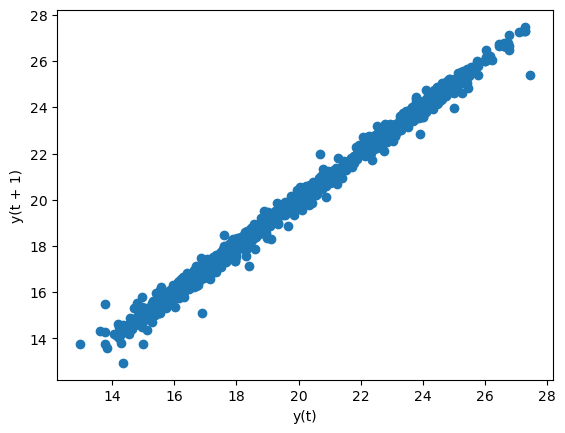

In [14]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(logista.close)

In [15]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [16]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = logista.close[:-10], logista.close[-10:]

train.shape, test.shape

((1876,), (10,))

In [17]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [18]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(logista.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    26.777327
2024-02-22    26.774656
2024-02-23    26.771986
2024-02-24    26.769319
2024-02-25    26.766653
2024-02-26    26.763989
2024-02-27    26.761328
2024-02-28    26.758668
2024-02-29    26.756010
2024-03-01    26.753354
Freq: D, dtype: float64

In [19]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    27.120001
2024-02-22    27.240000
2024-02-23    27.299999
2024-02-24    27.299999
2024-02-25    27.299999
2024-02-26    27.480000
2024-02-27    25.379999
2024-02-28    25.120001
2024-02-29    24.840000
2024-03-01    24.680000
Freq: D, Name: close, dtype: float64

In [20]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

1.0125427116153833

In [21]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,27.120001,26.777327,-0.342674
2024-02-22,27.240000,26.774656,-0.465344
2024-02-23,27.299999,26.771986,-0.528013
2024-02-24,27.299999,26.769319,-0.530680
2024-02-25,27.299999,26.766653,-0.533346
2024-02-26,27.480000,26.763989,-0.716011
2024-02-27,25.379999,26.761328,1.381329
2024-02-28,25.120001,26.758668,1.638667
2024-02-29,24.840000,26.756010,1.916010
2024-03-01,24.680000,26.753354,2.073354
